In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# Load Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
!pip install pandas-profiling

In [11]:
from pandas_profiling import ProfileReport

In [15]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

# Look Dataset

In [2]:
path = '/kaggle/input/california-housing-prices/housing.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe().T

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [7]:
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

<AxesSubplot:>

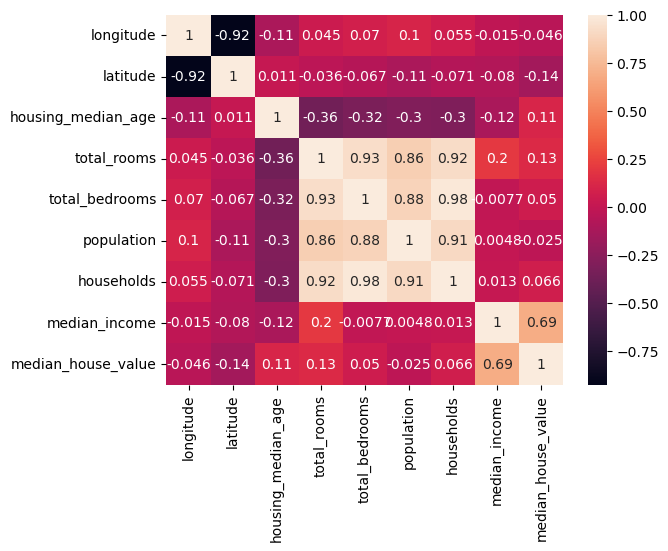

In [9]:
sns.heatmap(df.corr(), annot =True)

**Import pandas Proofing**

In [12]:
profile = ProfileReport(df, title='EDA')

In [13]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Pre Processing

In [34]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [28]:
def preProcessData(df):
    df.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace=True)

In [20]:
def dropCoulmns(df):
    df.drop('ocean_proximity',axis=1,inplace=True)

In [32]:
preProcessData(df)
dropCoulmns(df)

**Outliers**

In [48]:
change_ot_col = []

In [44]:
def getEachQuantiles(df_new, column,min_range, max_range):
  return [df_new[column].quantile(min_range), df_new[column].quantile(max_range)]

In [45]:
def handle_outliers(df_new):

  def drop_col():
    df_new.drop(columns=change_ot_col,axis=1, inplace=True)

  def rename_col():

    # create dic of dolumns which need to rename
    col_namaes = { ''.join([change_ot_col[i],'_test']): change_ot_col[i] for i in range(len(change_ot_col))}
    df_new.rename(columns = col_namaes, inplace=True)

  # fill all outliers with median - Range of outlier Q1-0.125 and Q3+0.125

  # total_rooms_median
  handel_column_outliers(df_new, 'total_rooms')
  
  # total_bedrooms      
  handel_column_outliers(df_new, 'total_bedrooms')

  # population
  handel_column_outliers(df_new, 'population')

  # households          
  handel_column_outliers(df_new, 'households')

  # median_income
  handel_column_outliers(df_new, 'median_income')       
  

  drop_col()
  rename_col()
  #total rooms

In [46]:
from math import sqrt

def handel_column_outliers(df_new, column):
  minval, maxval = getEachQuantiles(df_new, column,0.05, 0.95)
  md_median = df_new[column].median()
  new_column_name = ''.join([column,'_test'])
  df_new[new_column_name] = df_new[column].apply(lambda x: x**(1/3) if ( x < minval or x > maxval) else x)
  change_ot_col.append(column)

In [51]:
def is_outlier_changes(df, df_new, cols):

  for col in cols:
    print(f'Col - {col}')
    print('Before Remove Outliers-------------')
    print(f'Min value = {df[col].min()} Max Value : {df[col].max()}')
    print('After Remove Outliers--------------')
    print(f'Min value = {df_new[col].min()} Max Value : {df_new[col].max()}')
   

In [40]:
#get copy of df before change outliers
df_new = df.copy()

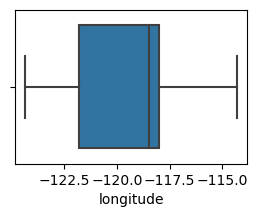

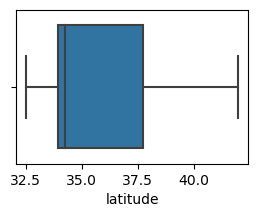

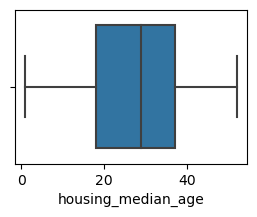

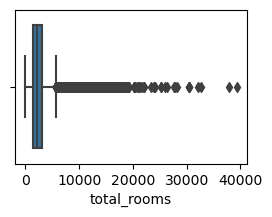

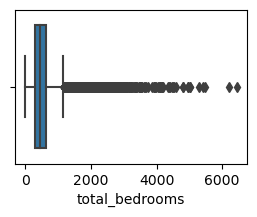

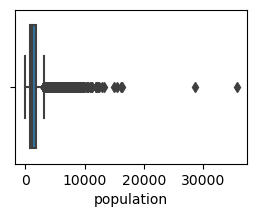

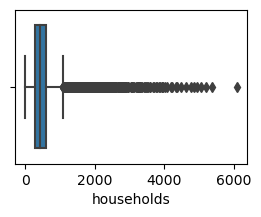

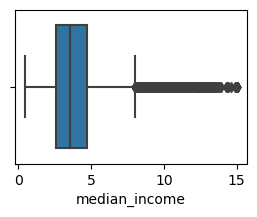

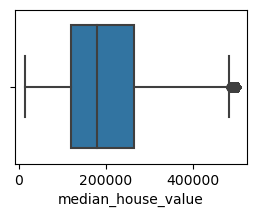

In [41]:
for col in df:
  plt.figure(figsize=(3,2))
  sns.boxplot(x=df[col], data=df_new)
  plt.show()

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Feature Selection

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [35]:
data1 = df.drop('median_house_value',axis=1)
target1= df['median_house_value']

In [36]:
f1 = SelectKBest(f_classif, k=4).fit(data1, target1)

In [38]:
f1.scores_

array([1.05653258, 1.25951125, 1.11517788, 1.55445873, 1.14848001,
       1.19632039, 1.20403281, 6.80719001])

# Create Model

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
def splitTrainTest(data,target):
  train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)

  return train_data, test_data, train_target, test_target

In [55]:
def train_model(df, scaling=True,n_neighbors=20):


  #tranning function
  def trainKNN(n_neighbors, train_data, test_data, train_target, test_target):

    df2 = pd.DataFrame(columns=['n','r2', 'mae'])
    n = pd.Series()
    r2= pd.Series()
    mae = pd.Series()

    mean_acc = np.zeros(n_neighbors)

    for i in range(1, n_neighbors+1):
      # print(f'n_neighbors is {i}')
      model = knn(n_neighbors=i)
      model.fit(train_data, train_target)
      pred = model.predict(test_data)
      # print(f'R2 : {r2_score(test_target, pred)}')
      # print(f'MAE: {mean_absolute_error(test_target, pred)}')

      # data = pd.Series( [i , r2_score(test_target, pred),mean_absolute_error(test_target, pred)] )
      
      df2.loc[i-3] = [i , r2_score(test_target, pred),mean_absolute_error(test_target, pred)] 
    
      # print(f'end of n_neighbors is {i}')

    print(df2.head())

    return df2

   #data and target
  data = df.drop('median_house_value',axis=1)
  target = df['median_house_value']

  #intialize scaler

  if scaling:
    scaler = StandardScaler()

    #scacle data
    data = scaler.fit_transform(data)

  #spliting data
  train_data, test_data, train_target, test_target = splitTrainTest(data,target)
  
  #look shape of splitied data
  print(train_data.shape, test_data.shape, train_target.shape, test_target.shape)

  #train the model
 
  df_data =trainKNN(n_neighbors, train_data, test_data, train_target, test_target)

  return df_data

In [56]:
def lookEval(df):
  fig, ax = plt.subplots(1,2)
# fig.set_title('Evaluations according to Neibhours')

  plt.rcParams["figure.figsize"] = [7.00, 3.50]
  plt.rcParams["figure.autolayout"] = True
  r2_max = df.r2.idxmax()

  sns.scatterplot(ax= ax[0], y=df.r2, x=df.n,  data=df)
  ax[0].axvline(r2_max,linewidth=4, color='r')


  sns.scatterplot(ax= ax[1], y=df.mae, x=df.n,  data=df)
  ax[1].axvline(r2_max, linewidth=4, color='g')

  plt.show

# Evaluations

**Scaling False**

- Not Remove Outliers

In [58]:
df_BS = df.copy()

In [59]:
df_Eval =train_model(df_BS,scaling=False,n_neighbors=50)

(16512, 8) (4128, 8) (16512,) (4128,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


      n        r2           mae
-2  1.0 -0.176200  94184.974564
-1  2.0  0.079242  84528.659036
 0  3.0  0.169741  81010.329457
 1  4.0  0.214803  79012.318435
 2  5.0  0.239889  77671.709787


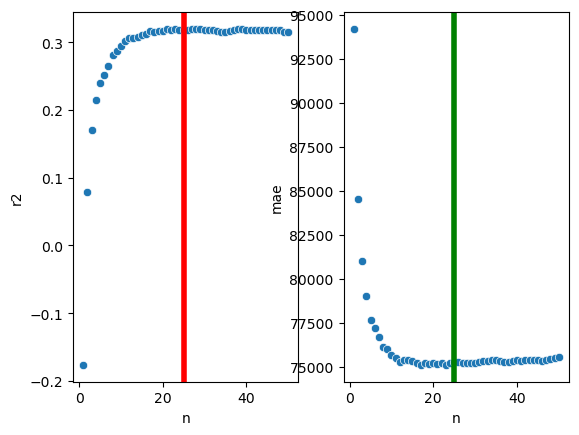

In [60]:
lookEval(df_Eval)

- Removed outliers

In [64]:
df_BSO = df.copy()

In [65]:
df_BSO = handle_outliers(df_new)

longitude  latitude  housing_median_age  median_house_value  \
0        -122.23     37.88                41.0            452600.0   
1        -122.22     37.86                21.0            358500.0   
2        -122.24     37.85                52.0            352100.0   
3        -122.25     37.85                52.0            341300.0   
4        -122.25     37.85                52.0            342200.0   
...          ...       ...                 ...                 ...   
20635    -121.09     39.48                25.0             78100.0   
20636    -121.21     39.49                18.0             77100.0   
20637    -121.22     39.43                17.0             92300.0   
20638    -121.32     39.43                18.0             84700.0   
20639    -121.24     39.37                16.0             89400.0   

       total_rooms  total_bedrooms   population   households  median_income  
0       880.000000        5.052774     6.854124   126.000000       2.026741  
1        19.219071     1106.000000  2401.000000  1138.000000       2.024808  
2      1467.000000      190.000000   496.000000   177.000000       7.257400  
3      1274.000000      235.000000   558.000000   219.000000       5.643100  
4      1627.000000      280.000000   565.000000   259.000000       3.846200  
...            ...             ...          ...          ...            ...  
20635  1665.000000      374.000000   845.000000   330.000000       1.159852  
20636   697.000000      150.000000   356.000000     4.848808       2.556800  
20637  2254.000000      485.000000  1007.000000   433.000000       1.700000  
20638  1860.000000      409.000000   741.000000   349.000000       1.867200  
20639  2785.000000      616.000000  1387.000000   530.000000       2.388600  

[20640 rows x 9 columns]

In [66]:
df_Eval =train_model(df_BSO,scaling=False,n_neighbors=50)

(16512, 8) (4128, 8) (16512,) (4128,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


      n        r2           mae
-2  1.0 -0.239974  95906.893411
-1  2.0  0.062643  84198.418484
 0  3.0  0.171775  79922.289648
 1  4.0  0.218947  78054.858043
 2  5.0  0.242981  77167.238469


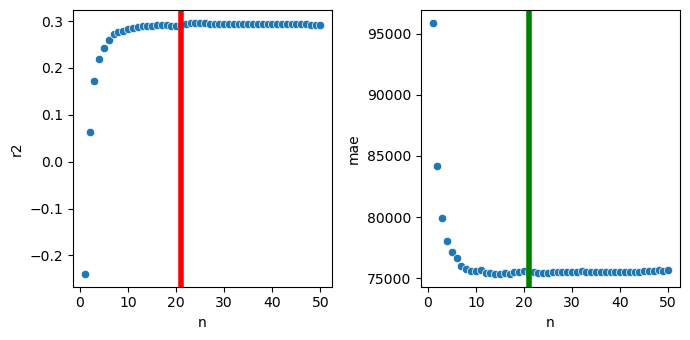

In [67]:
lookEval(df_Eval)

**Scaling True**

- Not Removed Outliers

In [68]:
df_BO = df.copy()

In [69]:
df_Eval =train_model(df_BO,n_neighbors=50)

(16512, 8) (4128, 8) (16512,) (4128,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


      n        r2           mae
-2  1.0  0.535079  49382.986919
-1  2.0  0.648874  44225.097626
 0  3.0  0.671963  42986.138647
 1  4.0  0.689895  42061.371669
 2  5.0  0.702496  41354.394525


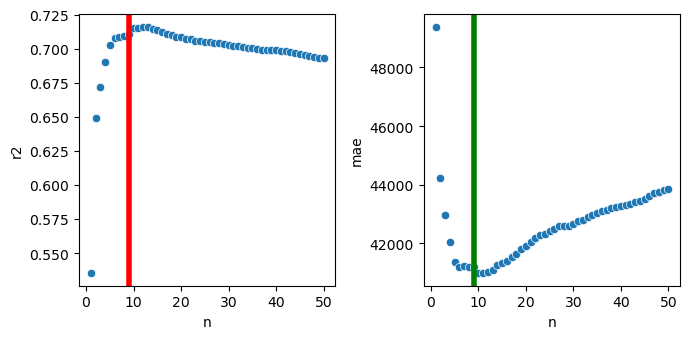

In [71]:
lookEval(df_Eval)

- Removed Outliers

In [72]:
df_AO =df_new

In [73]:
df_Eval=train_model(df_AO,n_neighbors=50)

(16512, 8) (4128, 8) (16512,) (4128,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


      n        r2           mae
-2  1.0  0.528224  52640.718750
-1  2.0  0.634485  47321.479651
 0  3.0  0.676502  45123.633802
 1  4.0  0.688296  44350.662003
 2  5.0  0.691372  44468.681928


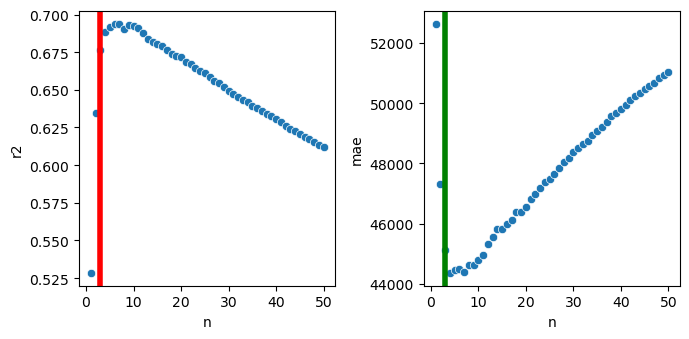

In [74]:
lookEval(df_Eval)

# Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
def HyperParameterTunig(train_data, train_target, hypergrid):
  gs = GridSearchCV(knn(), hypergrid, verbose =1 , cv= 3, n_jobs=-1)
  result = gs.fit(train_data, train_target)

  return result.best_score_, result.best_params_

def printScore(score, params):
  print(f'Score : {score}')
  print(f'Paraams : {params}')

In [77]:
hypergrid = {
    'n_neighbors': [5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan' ]
}

In [78]:
hypergrid2 = {
    'n_neighbors': [x for x in range(1,20,2)],
    'weights' : ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan' ],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [x for x in range(1,10,2)]
}

In [79]:
hyperdf = df.copy()

In [ ]:
data1 = hyperdf.drop('median_house_value',axis=1)
target1 = hyperdf['median_house_value']

In [80]:
# scale data
scaler = StandardScaler()
data1 = scaler.fit_transform(data1)

In [81]:
train_data, test_data, train_target, test_target = train_test_split(data1, target1, test_size=0.2)

**Hyper Grid 1**

In [82]:
score1, params1 = HyperParameterTunig(train_data, train_target, hypergrid)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [83]:
printScore(score1, params1)

Score : 0.7243925332976536
Paraams : {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


**Hyper Grid 2**

In [84]:
score2, params2 = HyperParameterTunig(train_data, train_target, hypergrid2)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


In [85]:
printScore(score2, params2)

Score : 0.7243925332976536
Paraams : {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


# Get Prediction with best parameters

In [88]:
# use the best hyperparameters
model = knn(algorithm ='auto', leaf_size = 1, metric = 'manhattan', n_neighbors = 11, weights= 'distance')
model.fit(train_data, train_target)

# pred_train = model.predict(train_data)
pred_test = model.predict(test_data)

# print(f'Train Accuracy :{r2_score(train_target, pred_train)}')
print(f'Test Accuracy :{r2_score(test_target, pred_test)}')

Test Accuracy :0.7288865625654871
